Project Topic

The purpose of this project is to identify the best predictor(s) of diabetes and which machine learning best predicts diabetes as an outcome. This problem will be solved by training a decision tree classifier and a logistic regression model.

My motivation behind this project is to clear up any misconceptions behind the causes of diabetes as well as inform anyone who is interested in improving the quality of life for people with diabetes and hopefully reverse it. The outcome of this project will produce actionable information that anyone can incorporate into daily life. Creating a healthy society with less sick people and allow anyone suffering from this disease to live a longer, healthier and happy life.

Data Source

The data set being used is from the website Kaggle:

[1] Diabetes Health Indicators Dataset
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.[1]

Data Description

Overview

The dataset I selected was the Diabetes Health Indicators Dataset hosted by Kaggle. It is derived from the The Behavioral Risk Factor Surveillance System (BRFSS) from 2015, it is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984.

For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

The data from the diabetes_binary_5050split_health_indicators_BRFSS2015.csv file contains a clean dataset of 70,692 (70,692 rows) survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either pre-diabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for pre-diabetes or diabetes. This dataset has 21 feature variables (4 numeric and 17 categorical) and is balanced.

Columns

Diabetes_binary (0 = no diabetes 1 = pre-diabetes 2 = diabetes) - categorical

HighBP (0 = no high BP 1 = high BP) - categorical

HighChol (0 = no high cholesterol 1 = high cholesterol) - categorical

CholCheck (0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years) - categorical

BMI (Body Mass Index) - numeric

Smoker (Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes) - categorical

Stroke ((Ever told) you had a stroke. 0 = no 1 = yes) - categorical

HeartDiseaseorAttack (coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes) - categorical

PhysActivity (physical activity in past 30 days - not including job 0 = no 1 = yes) - categorical

Fruits (Consume Fruit 1 or more times per day 0 = no 1 = yes) - categorical

Veggies (Consume Vegetables 1 or more times per day 0 = no 1 = yes) - categorical

HvyAlcoholConsump ((adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes) - categorical
  
AnyHealthcare (Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes) - categorical

NoDocbcCost (Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes) - categorical

GenHlth (Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor) - numeric

MentHlth (days of poor mental health scale 1-30 days) - numeric

PhysHlth (physical illness or injury days in past 30 days scale 1-30) - numeric

DiffWalk (Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes) - categorical

Sex (0 = female 1 = male) - categorical

Age (13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older) - categorical

Education (Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.) - categorical

Income (Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more) - categorical

In [55]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [56]:
# Load Data Set Into Pandas Dataframe
df = pd.read_csv('./data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Display Data Information
df.info()

# Describe Data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [57]:
# Data Cleaning

# Check For Null Values
print(df.isnull().sum().sum())
# None Found

# Check For Duplicate Rows
print(df.duplicated().sum())
# 1635 Found

# Drop Duplicate Rows
df.drop_duplicates(inplace = True)

# Print new shape of dataframe
print(df.shape)

# Rename the Diabetes_binary column to be more friendly
df.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)

# Describe the data again to ensure name was changed
df.describe()

# Let's print all the counts for each of the features and give a breakdown of them
for col in df.columns:
    print(col, '\n', df[col].value_counts())
    print(50*'-')


0
1635
(69057, 22)
Diabetes 
 Diabetes
1.0    35097
0.0    33960
Name: count, dtype: int64
--------------------------------------------------
HighBP 
 HighBP
1.0    39447
0.0    29610
Name: count, dtype: int64
--------------------------------------------------
HighChol 
 HighChol
1.0    36692
0.0    32365
Name: count, dtype: int64
--------------------------------------------------
CholCheck 
 CholCheck
1.0    67317
0.0     1740
Name: count, dtype: int64
--------------------------------------------------
BMI 
 BMI
27.0    6118
26.0    4801
28.0    4452
30.0    4282
24.0    4168
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: count, Length: 80, dtype: int64
--------------------------------------------------
Smoker 
 Smoker
0.0    35776
1.0    33281
Name: count, dtype: int64
--------------------------------------------------
Stroke 
 Stroke
0.0    64662
1.0     4395
Name: count, dtype: int64
--------------------------------------------------
HeartDiseas

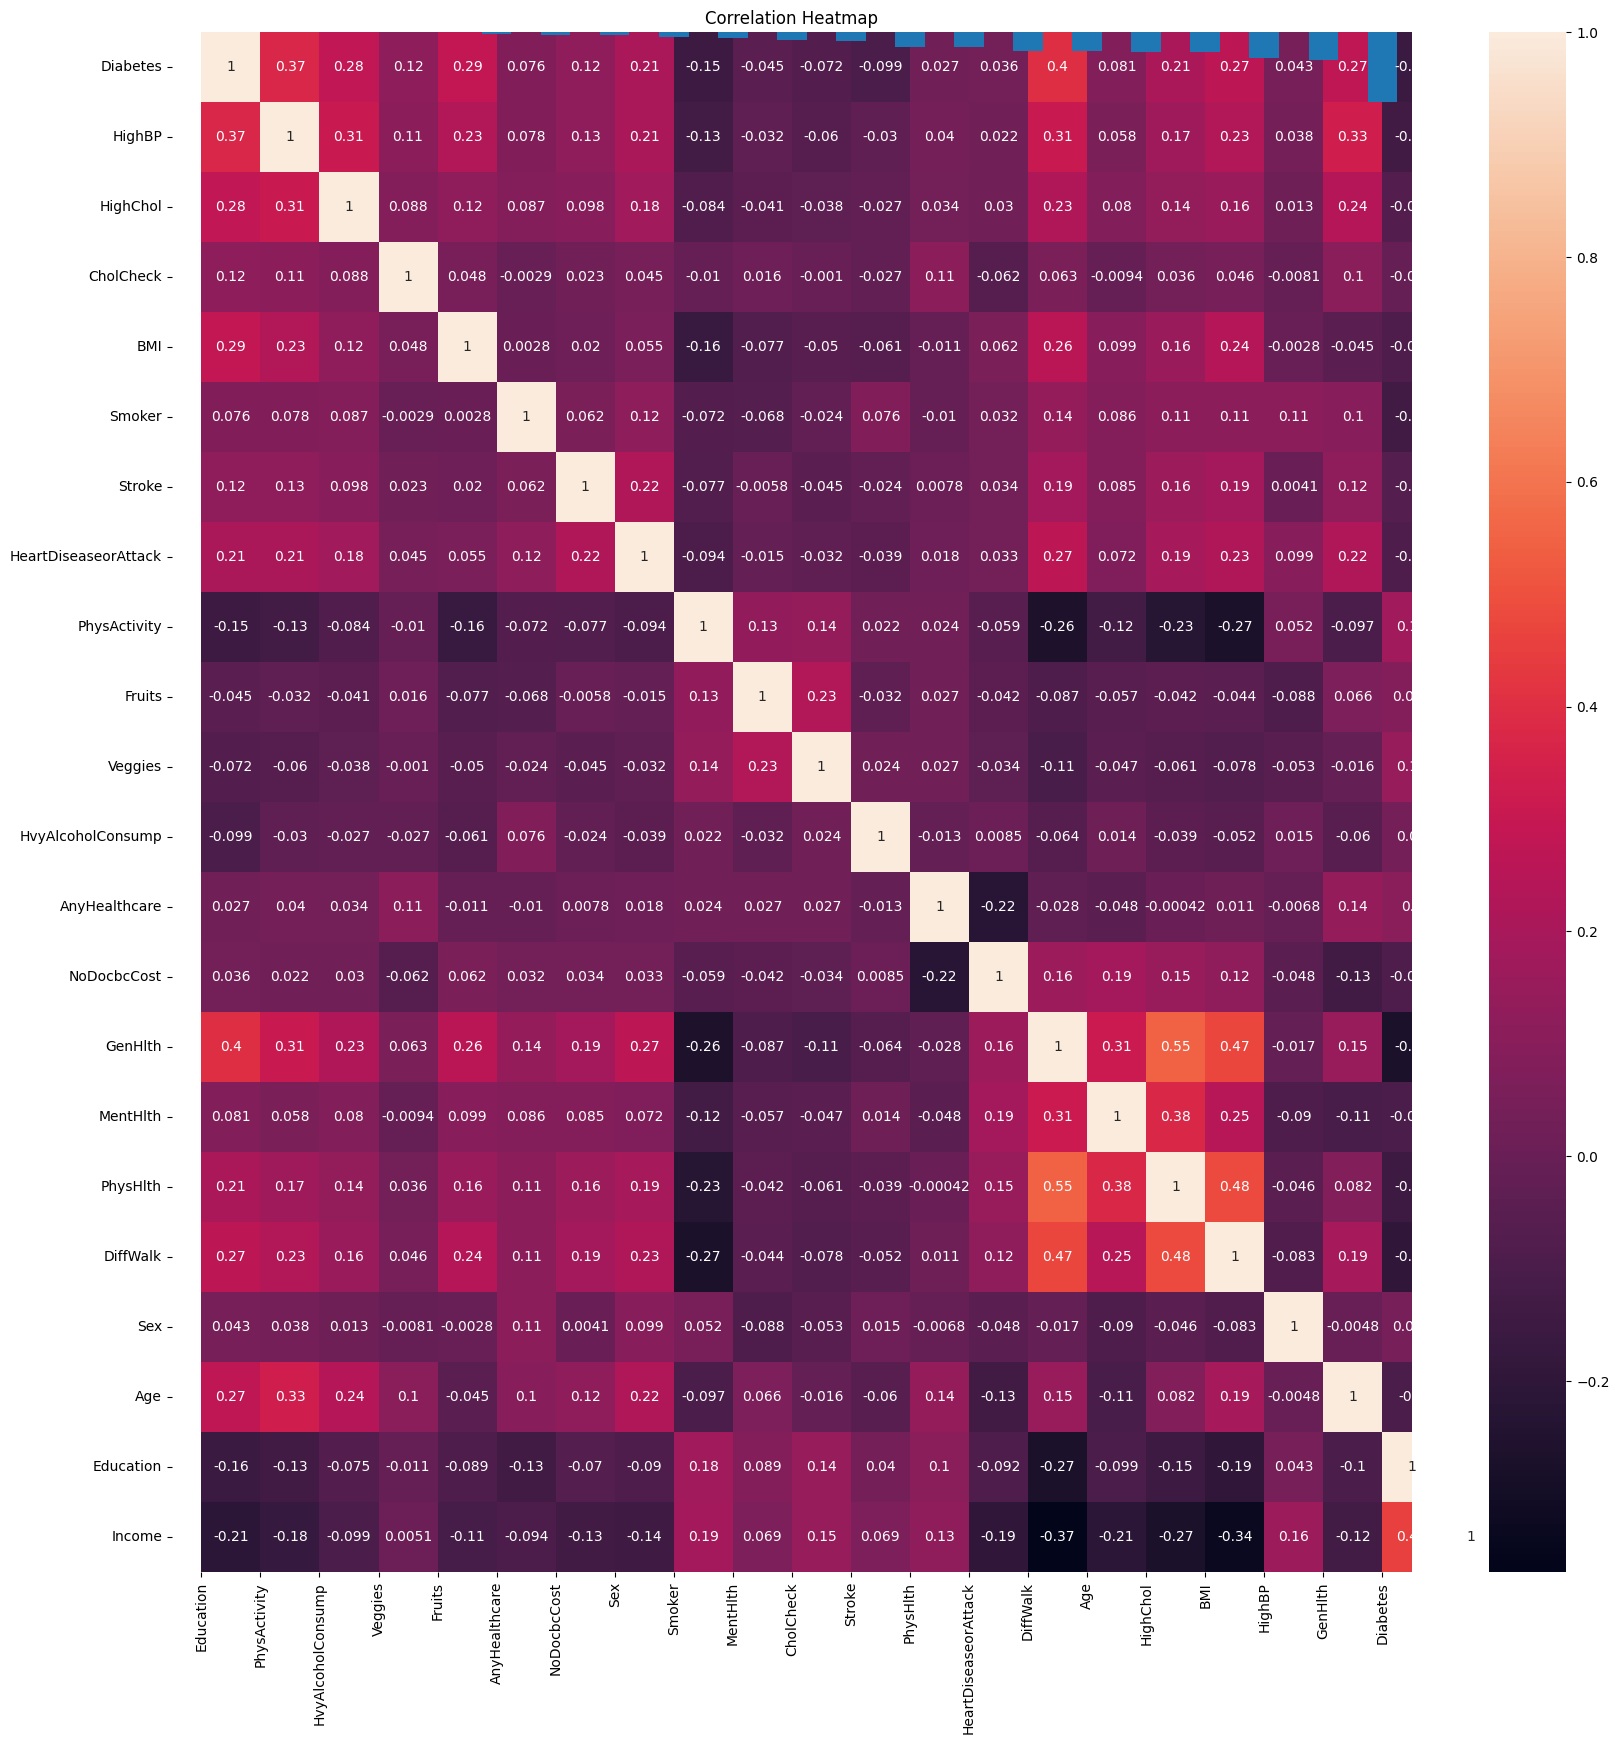

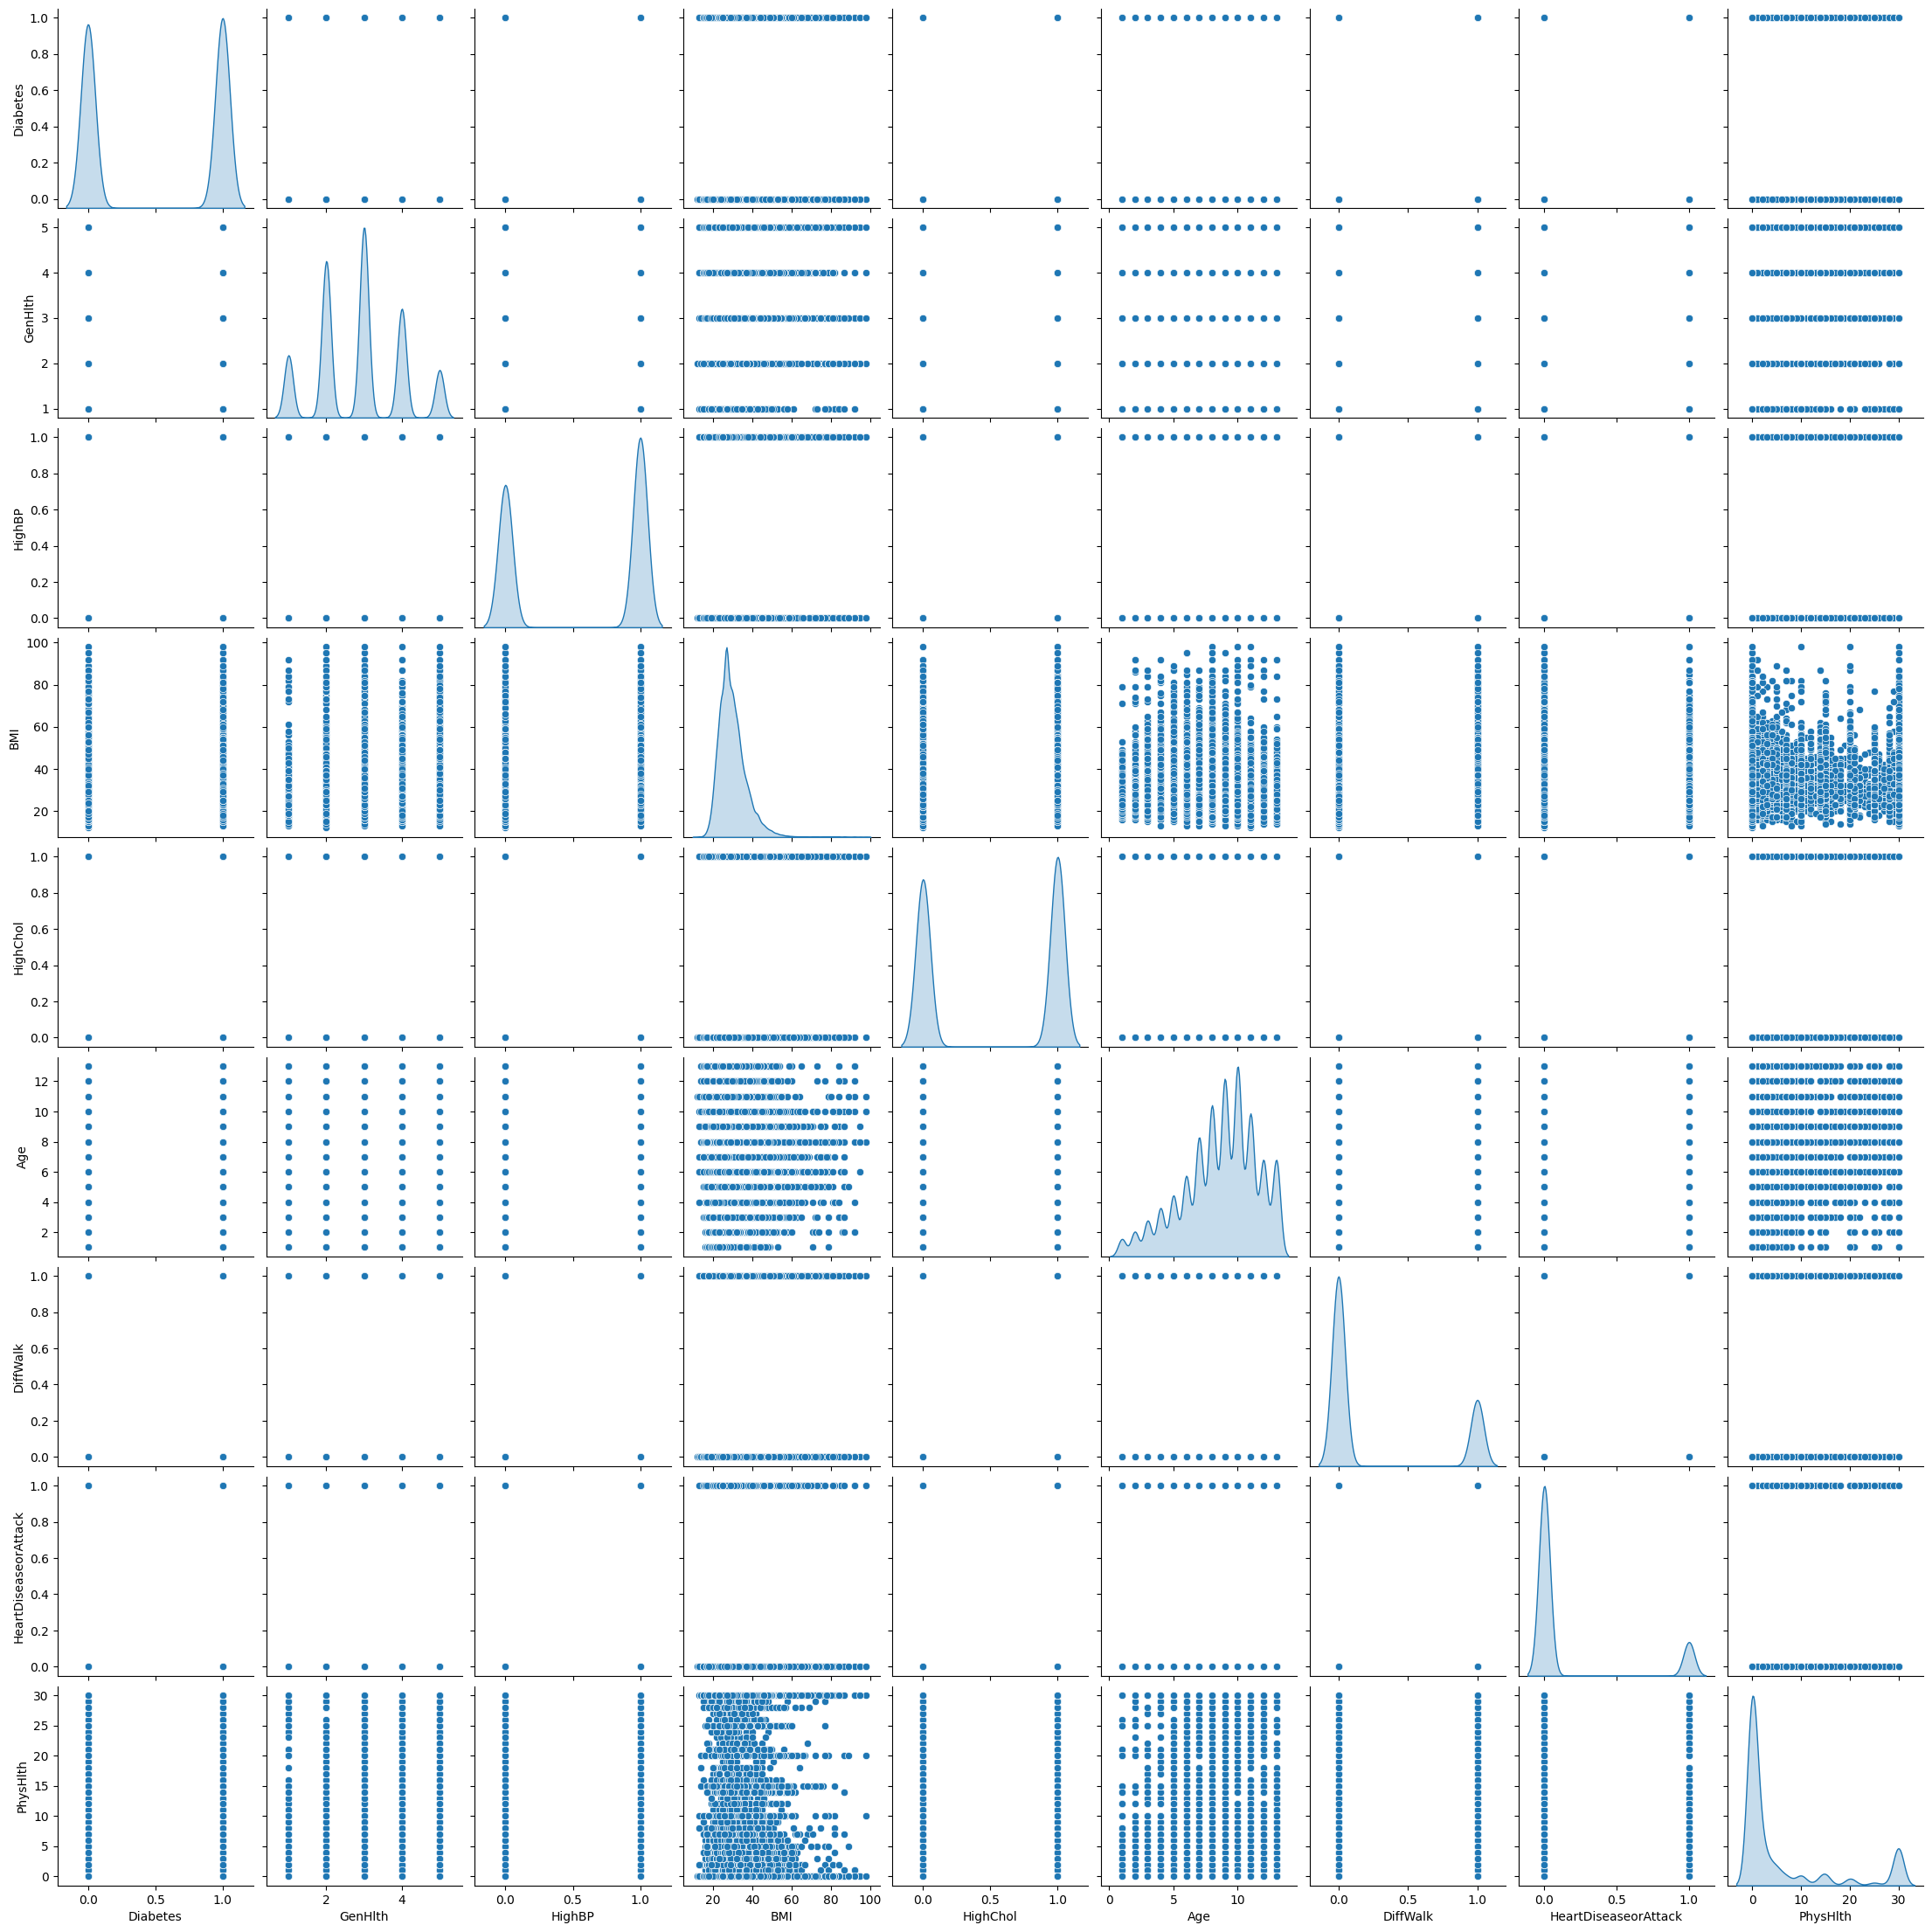

In [58]:
# Exploratory Data Analysis

# Let's display the correlation matrix to see what features are the most relevant
df.corr()

# Based off the correlation matrix it appears that the features that are the most correlated with diabetes are:
# HighChol
# BMI
# DiffWalk
# HighBP
# GenHlth
# My best predictor of diabetes is GenHlth

# Create a heatmap using the seaborn library to better visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True).set_title('Correlation Heatmap')

# Create the correlation plot between the feature variables and Diabetes
df.corr()['Diabetes'][:-1].sort_values().plot(kind='bar')
# Here we can see better the most correlated features with Diabetes

# Create a Pair Plot with the relevant features
pair_plot_df = df[['Diabetes', 'GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'HeartDiseaseorAttack', 'PhysHlth']]
sns.pairplot(pair_plot_df, diag_kind='kde')
plt.show()


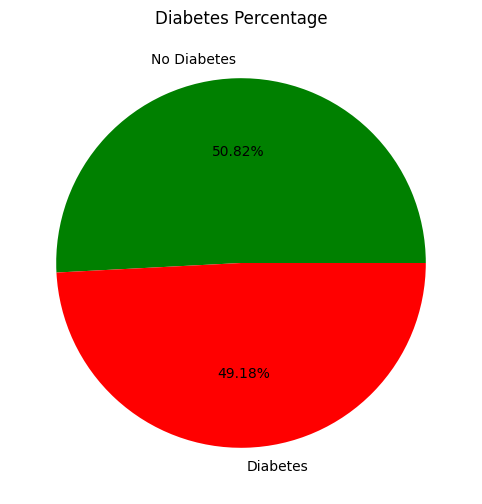

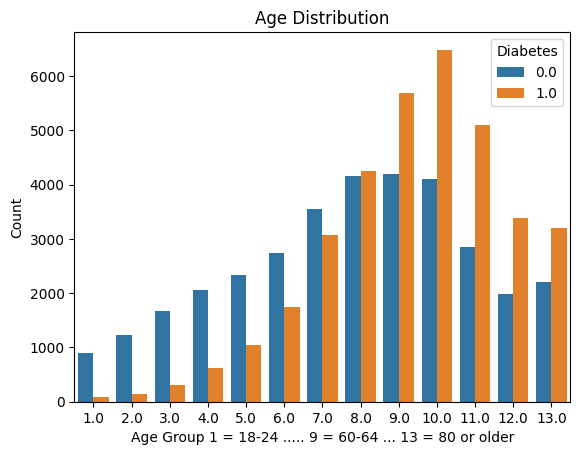

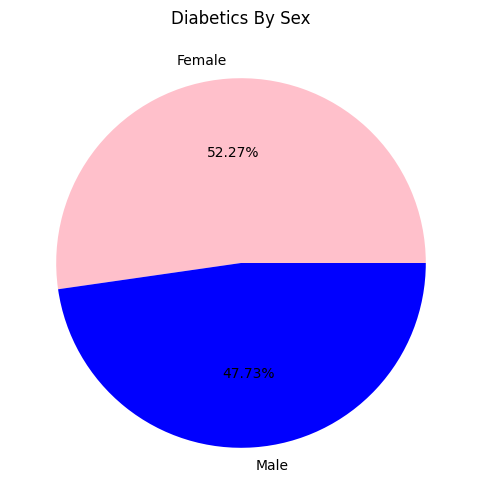

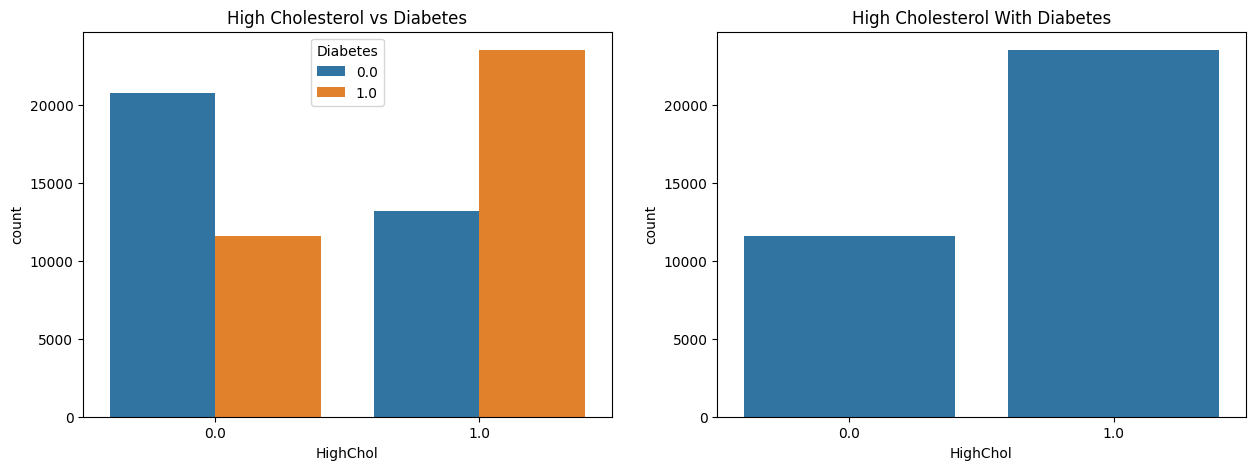

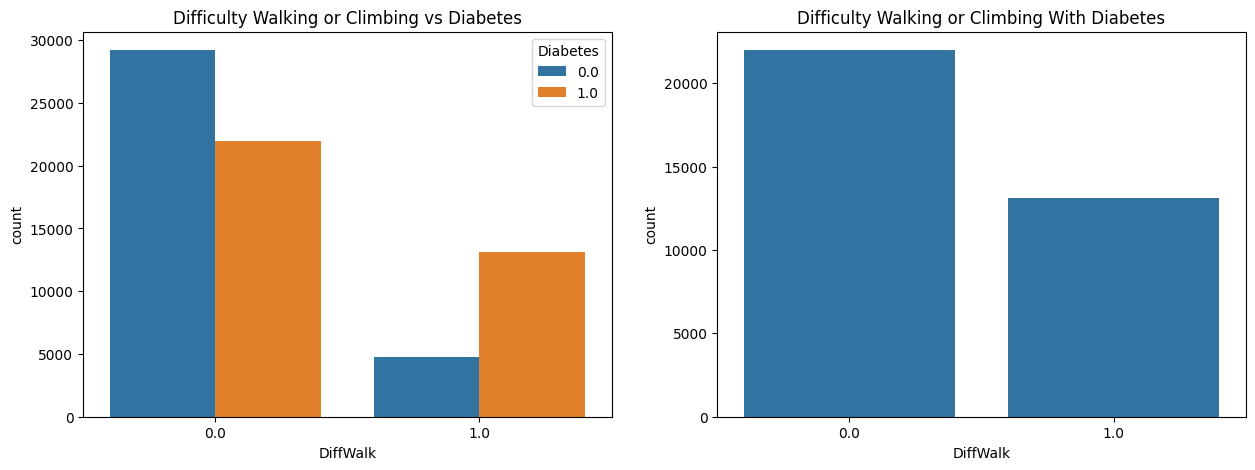

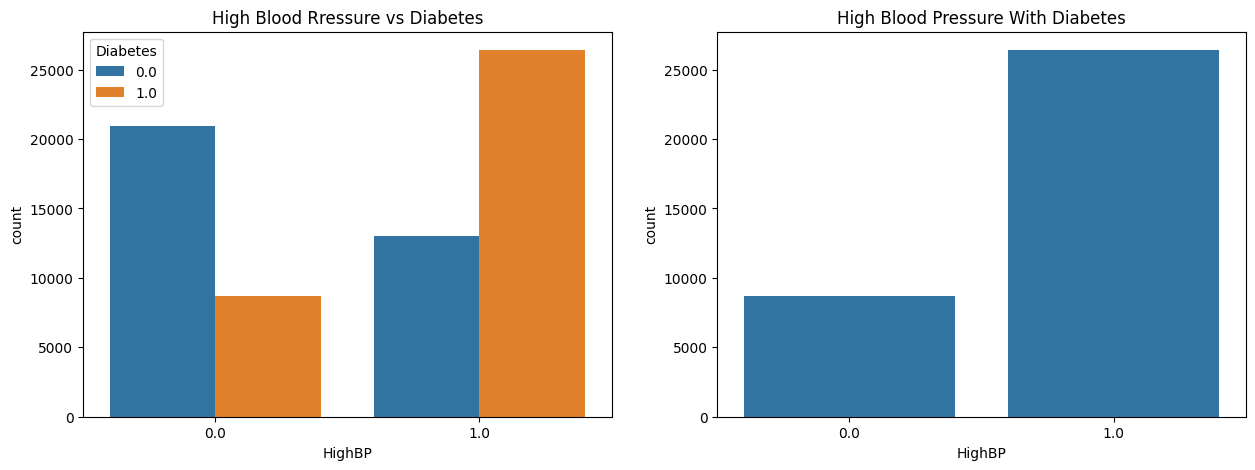

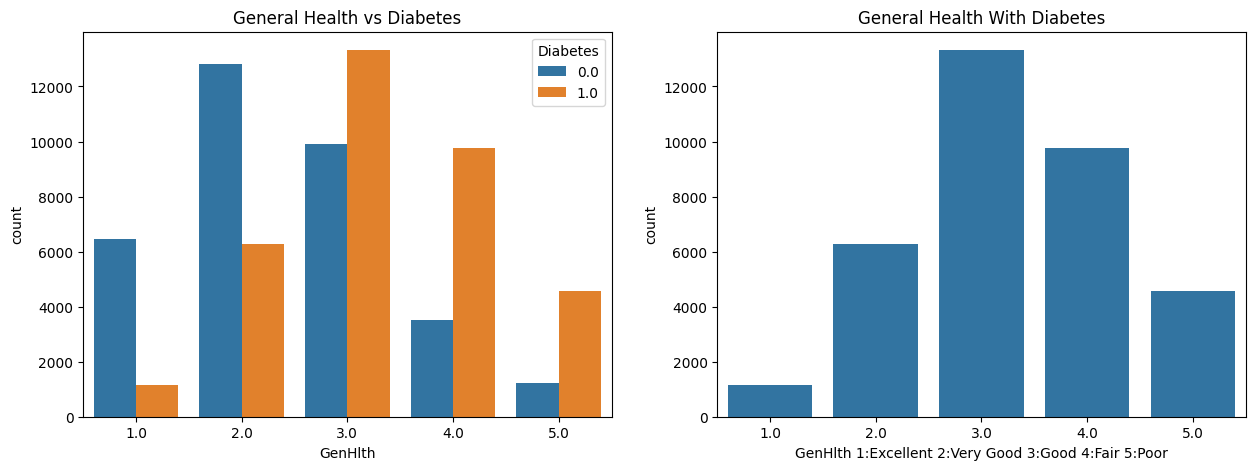

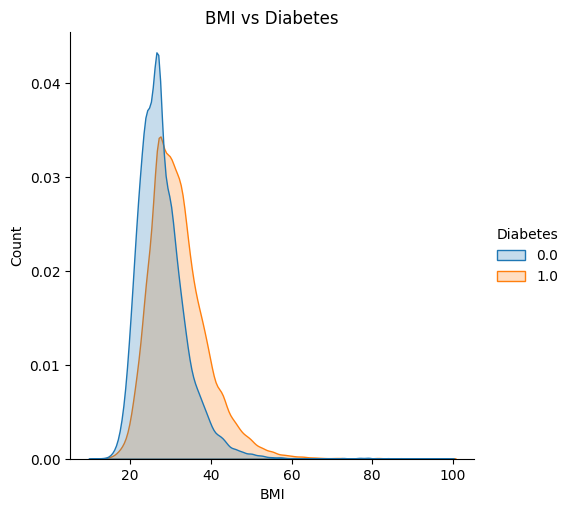

In [60]:
# Now lets chart some of the features as well as the data to get a further breakdown of the data as well as gain more insight

# Let's look at the breakdown of the dataset in terms of people with and without diabetes
plt.figure(figsize=(10, 6))
plt.pie(df['Diabetes'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%', colors=['blue', 'red'])
plt.title('Diabetes Percentage')
plt.show()
# Based off this chart 50.82% of our dataset does not have diabetes and 49.18% has diabetes

# To get more insight into the dataset lets get a better look at the distribution of the age
sns.countplot(x='Age', data=df, hue='Diabetes')
plt.title('Age Distribution')
# See the data description above to get further clarity on the age group breakdown / distribution
plt.xlabel('Age Group 1 = 18-24 ..... 9 = 60-64 ..... 13 = 80 or older')
plt.ylabel('Count')
plt.show()
# As you can see from this chart the older people get there more often they are diagnosed with Diabetes

# Let's further breakdown the dataset by sex
diabetics_df = df.where(df.Diabetes == 1)
diabetics_df.dropna(inplace = True)
plt.figure(figsize=(10, 6))
plt.pie(diabetics_df['Sex'].value_counts(), labels=['Female', 'Male'] , autopct='%1.2f%%', colors=['pink', 'blue'])
plt.title('Diabetics By Sex')
plt.show()
# There appears to be no strong relationship between diabetes and sex

# Let's get a better look at the relationship between diabetes and high cholesterol
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='HighChol', data=df, hue='Diabetes', ax=ax[0]).set_title('High Cholesterol vs Diabetes')
sns.countplot(x='HighChol', data=diabetics_df, ax=ax[1]).set_title('High Cholesterol With Diabetes')
# As you can see from the charts there is a relationship between people that have high cholesteral and diabetes

# Let's get a better look at the relationship between diabetes and difficulty walking
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='DiffWalk', data=df, hue='Diabetes', ax=ax[0]).set_title('Difficulty Walking or Climbing vs Diabetes')
sns.countplot(x='DiffWalk', data=diabetics_df, ax=ax[1]).set_title('Difficulty Walking or Climbing With Diabetes')
# As you can see from these charts there is a relationship between people that have difficulty walking and diabetes

# Let's get a better look at the relationship between diabetes and high blood pressure
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='HighBP', data=df, hue='Diabetes', ax=ax[0]).set_title('High Blood Rressure vs Diabetes')
sns.countplot(x='HighBP', data=diabetics_df, ax=ax[1]).set_title('High Blood Pressure With Diabetes')
# As you can see from the charts there is a significant relationship between people that have high blood pressure and diabetes

# Let's get a better look at the relationship between diabetes and general health
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='GenHlth', data=df, hue='Diabetes', ax=ax[0]).set_title('General Health vs Diabetes')
sns.countplot(x='GenHlth', data=diabetics_df, ax=ax[1]).set_title('General Health With Diabetes')
plt.xlabel('GenHlth 1:Excellent 2:Very Good 3:Good 4:Fair 5:Poor')
# It appears people with good to poor health are much more succeptable to developing diabetes

# Let's get a better look at the relationship between BMI and diabetes
sns.displot(df, x="BMI", hue="Diabetes", kind="kde", fill=True)
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()
# Based on the chart it appears that the higher your BMI the more likely it is that you will develop diabetes

# To wrap this up, we took a look at several of the key features of the data that have a high correlation with diabetes.
# This helps us understand how several health indicators can be a predictor if someone has or could develop diabetes if they
# are in these higher risk categories.

In [61]:
# Models

# Split the data into training and test data sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes', axis=1), df['Diabetes'], test_size=0.2, random_state=42, shuffle=True)

In [62]:
# Simple Linear Regression
# Fit a simple linear regression model with a feature that maximizes R2 (best fit)
columns = df.columns
predictors_list_of_dicts = []
for col in columns:
    simple_linear_model = smf.ols(formula='Diabetes ~ {}'.format(col), data=df).fit()
    summary = simple_linear_model.summary()
    d = {'column_name': col, 'value': model.rsquared}
    predictors_list_of_dicts.append(d)
res = sorted(predictors_list_of_dicts, key=lambda d: d['value'])
print(res)
simple_linear_model = smf.ols(formula='Diabetes ~ GenHlth', data=df).fit()
# Using a simple linear regression model the best predictor of diabetes is GenHlth feature with a R2 value of 0.157

[{'column_name': 'Diabetes', 'value': 0.29292551844365267}, {'column_name': 'HighBP', 'value': 0.29292551844365267}, {'column_name': 'HighChol', 'value': 0.29292551844365267}, {'column_name': 'CholCheck', 'value': 0.29292551844365267}, {'column_name': 'BMI', 'value': 0.29292551844365267}, {'column_name': 'Smoker', 'value': 0.29292551844365267}, {'column_name': 'Stroke', 'value': 0.29292551844365267}, {'column_name': 'HeartDiseaseorAttack', 'value': 0.29292551844365267}, {'column_name': 'PhysActivity', 'value': 0.29292551844365267}, {'column_name': 'Fruits', 'value': 0.29292551844365267}, {'column_name': 'Veggies', 'value': 0.29292551844365267}, {'column_name': 'HvyAlcoholConsump', 'value': 0.29292551844365267}, {'column_name': 'AnyHealthcare', 'value': 0.29292551844365267}, {'column_name': 'NoDocbcCost', 'value': 0.29292551844365267}, {'column_name': 'GenHlth', 'value': 0.29292551844365267}, {'column_name': 'MentHlth', 'value': 0.29292551844365267}, {'column_name': 'PhysHlth', 'value':

In [63]:
# Let's now use our best predictor and create a polynomial regression model with N=10
predictor = 'GenHlth'
predictors_list_of_dicts = []
for degrees in range(1, 11):
    terms = 'GenHlth'
    for degree in range(1, degrees):
        terms += ' + np.power({}, {})'.format(predictor, degree + 1)
    formula = 'Diabetes ~ {}'.format(terms)
    print(formula)
    polynomial_model = smf.ols(formula='{}'.format(formula), data=df).fit()
    summary = model.summary()
    d = {'degree': degrees, 'value': model.rsquared, 'formula': formula}
    predictors_list_of_dicts.append(d)
res = sorted(predictors_list_of_dicts, key=lambda d: d['value'])
print(res)
polynomial_model = smf.ols(formula='Diabetes ~ GenHlth + np.power(GenHlth, 2) + np.power(GenHlth, 3) + np.power(GenHlth, 4) + np.power(GenHlth, 5)', data=df).fit()
# Using polynomial regression with GenHlth as our best predictor the best degree is 5 with an R2 value of 0.16443762827445674
# This model gives us a better fit than the simple linear regression above

Diabetes ~ GenHlth
Diabetes ~ GenHlth + np.power(GenHlth, 2)
Diabetes ~ GenHlth + np.power(GenHlth, 2) + np.power(GenHlth, 3)
Diabetes ~ GenHlth + np.power(GenHlth, 2) + np.power(GenHlth, 3) + np.power(GenHlth, 4)
Diabetes ~ GenHlth + np.power(GenHlth, 2) + np.power(GenHlth, 3) + np.power(GenHlth, 4) + np.power(GenHlth, 5)
Diabetes ~ GenHlth + np.power(GenHlth, 2) + np.power(GenHlth, 3) + np.power(GenHlth, 4) + np.power(GenHlth, 5) + np.power(GenHlth, 6)
Diabetes ~ GenHlth + np.power(GenHlth, 2) + np.power(GenHlth, 3) + np.power(GenHlth, 4) + np.power(GenHlth, 5) + np.power(GenHlth, 6) + np.power(GenHlth, 7)
Diabetes ~ GenHlth + np.power(GenHlth, 2) + np.power(GenHlth, 3) + np.power(GenHlth, 4) + np.power(GenHlth, 5) + np.power(GenHlth, 6) + np.power(GenHlth, 7) + np.power(GenHlth, 8)
Diabetes ~ GenHlth + np.power(GenHlth, 2) + np.power(GenHlth, 3) + np.power(GenHlth, 4) + np.power(GenHlth, 5) + np.power(GenHlth, 6) + np.power(GenHlth, 7) + np.power(GenHlth, 8) + np.power(GenHlth, 9)
D

In [64]:
# Now let's create a multi linear model with our best predictors
# HighChol
# BMI
# DiffWalk
# HighBP
# GenHlth
multi_linear_model = smf.ols(formula='Diabetes ~ HighChol + BMI + DiffWalk + HighBP + GenHlth + Age', data=df).fit()
print(multi_linear_model.summary())
# Based off our results we can see this model did much better with a R2 value of 0.288

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     4658.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:27:13   Log-Likelihood:                -38378.
No. Observations:               69057   AIC:                         7.677e+04
Df Residuals:                   69050   BIC:                         7.683e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5680      0.009    -60.318      0.0

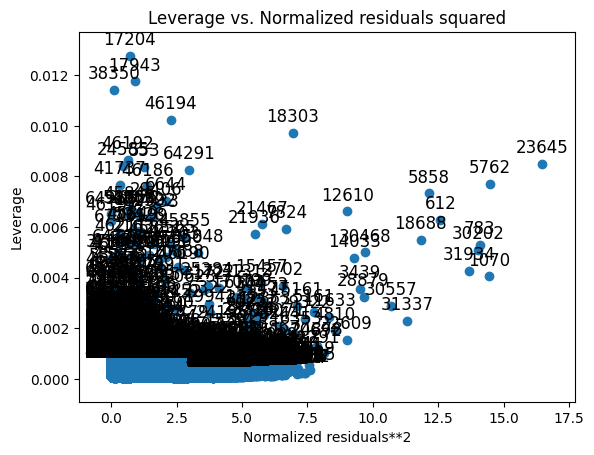

In [65]:
# Let's see if we can do even better by plotting the leverage vs. the square of the residual
# And potentially removing any outliers in the data in order to improve the fit of our model
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [66]:
# Based on the above we can remove 46214 and 27801
df = df.drop(index=[23645, 17204])
refined_multi_linear_model = smf.ols(formula=
                      'Diabetes ~ HighChol + BMI + DiffWalk + HighBP + GenHlth + Age',
                      data=df).fit()
print(refined_multi_linear_model.summary())
# This didn't appear to improve the fit of our model and had no impact

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     4660.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:28:17   Log-Likelihood:                -38372.
No. Observations:               69055   AIC:                         7.676e+04
Df Residuals:                   69048   BIC:                         7.682e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5690      0.009    -60.398      0.0

In [67]:
# Let's further address the possibility of interactions between the features
# We want to find out if there are statstically significant interaction terms 𝑝 = 0.05
print(model.params)
refined_multi_linear_model = smf.ols(formula=
'Diabetes ~ HighChol + BMI + DiffWalk + HighBP + GenHlth + Age + HighChol:BMI + HighChol:DiffWalk + HighChol:HighBP + HighChol:GenHlth + HighChol:Age',
data=df).fit()
print(refined_multi_linear_model.summary())
# Further refine the model
# Remove the insignificant terms HighChol:GenHlth and HighChol:DiffWalk
refined_multi_linear_model = smf.ols(formula=
'Diabetes ~ HighChol + BMI + DiffWalk + HighBP + GenHlth + Age + HighChol:BMI + HighChol:HighBP + HighChol:Age + BMI:DiffWalk + BMI:HighBP + BMI:GenHlth + BMI:Age',
data=df).fit()
print(refined_multi_linear_model.summary())
# Add more interaction terms
refined_multi_linear_model = smf.ols(formula=
'Diabetes ~ HighChol + BMI + DiffWalk + HighBP + GenHlth + Age + HighChol:BMI + HighChol:HighBP + HighChol:Age + BMI:DiffWalk + BMI:HighBP + BMI:GenHlth + BMI:Age',
data=df).fit()
print(refined_multi_linear_model.summary())
# Remove BMI:HighBP
refined_multi_linear_model = smf.ols(formula=
'Diabetes ~ HighChol + BMI + DiffWalk + HighBP + GenHlth + Age + HighChol:BMI + HighChol:HighBP + HighChol:Age + BMI:DiffWalk + BMI:GenHlth + BMI:Age + HighBP:GenHlth + HighBP:Age + GenHlth:Age',
data=df).fit()
print(refined_multi_linear_model.summary())
# Remove GenHlth:Age and HighBP:Age and Age
refined_multi_linear_model = smf.ols(formula=
'Diabetes ~ HighChol + BMI + DiffWalk + HighBP + GenHlth + Age + HighChol:BMI + HighChol:HighBP + HighChol:Age + BMI:DiffWalk + BMI:GenHlth + BMI:Age + HighBP:GenHlth',
data=df).fit()
print(refined_multi_linear_model.summary())
# Now we have further refined our model with interaction terms that are statstically significant
# We have increased our model fit as well (R2) to 0.293

Intercept         -0.442996
HighChol           0.261626
BMI                0.005741
DiffWalk           0.155261
HighBP             0.199247
GenHlth            0.138991
Age               -0.005293
HighChol:BMI      -0.001603
HighChol:HighBP    0.038163
HighChol:Age      -0.013978
BMI:DiffWalk      -0.004024
BMI:GenHlth       -0.000683
BMI:Age            0.001342
HighBP:GenHlth    -0.020192
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     2552.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:28:29   Log-Likelihood:                -38329.
No. Observations:               69055   AIC:                         7.668e+04
Df Residuals:                   69043   

In [77]:
# Results and Analysis
# Create a helper function for the final summary of the models
def add_to_summary_df(summary, model_name, r_squared, adj_r_squared):
    if summary is None:
        summary = pd.DataFrame(columns=["Model Name", "R Squared", "Adjusted R Squared"])
    model_summary = {"Model Name": [model_name],
                          "R Squared": [r_squared],
                          "Adjusted R Squared": [adj_r_squared]}
    return pd.concat([summary, pd.DataFrame(model_summary)], ignore_index=True)

model_summary_df = add_to_summary_df(None, 'simple_linear_model', simple_linear_model.rsquared_adj, simple_linear_model.rsquared)
model_summary_df = add_to_summary_df(model_summary_df, 'polynomial_model', polynomial_model.rsquared_adj, polynomial_model.rsquared)
model_summary_df = add_to_summary_df(model_summary_df, 'multi_linear_model', multi_linear_model.rsquared_adj, multi_linear_model.rsquared)
print(model_summary_df)

            Model Name  R Squared  Adjusted R Squared
0  simple_linear_model   0.157256            0.157268
1     polynomial_model   0.164389            0.164438
2   multi_linear_model   0.288049            0.288110


/var/folders/fl/gxslmk_94dl9m628p8kvdj3m0000gn/T/ipykernel_27828/2616468043.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([summary, pd.DataFrame(model_summary)], ignore_index=True)


Based off of the results from our three models we can see that we were able to find the best fit using the multi_linear_model
This is based off of the R Squared metric. I chose this metric because it is the best available metric to measure fit of a model.
As we saw earlier we used the best predictor for our original simple model, then we used this predictor to create our polynomial model
We found the best degree to be 5. Once we completed this model we moved onto creating a multi linear model using our best predictors.
This was our best model because it had the best fit and the highest r squared value. We were able to iterate on the evaluation process
in order to create the best model for this problem. We addressed which features are best and used them for predictions. Performance was
better with a multi variate model because Diabetes is a multi variate problem and there are many indictators of lifestyle or health factors
that can contribute to it.

Discussion and Conclusion
The key takeaways from this process were that in order to predict that someone has diabetes is a multi variate problem and isn't a simple
one size fits all problem / solution. It is a multi variate problem and several different lifestyle and health factors can indicate someone
may be at risk for diabetes. As mentioned above we discovered that the following factors were most correlated with diabetes: 
HighChol
BMI
DiffWalk
HighBP
GenHlth
A key takeaway from this analysis would be that in order to prevent diabetes make sure to have a health cholesteral level, BMI
and blood pressure. Another few things would be to make sure to keep exercising and try to stay mobile for as long as you can.
Finally for general health. It is important to stay healthy all around this could include visits to the doctor, diet plan, regular sleep
exercise and you should consult your physician for other strategies to prevent you getting diabetes.
Another point as well, we tried to remove any outliers and this didn't seem to have an effect on the results of the fit of our models.
I think a way to improve on this would be to create a threshold for certain outlier data points and remove more in order to get a better fit.
I don't think this worked because we only removed two data points which weren't enough to have a large impact.